# DATA SCIENCE INTERNSHIP AT DATA GLACIER


## Week 10 Assignment

### Project: Healthcare- Persistency of a drug 

### Deliverables: EDA performed on the Dataset

#### Author: _Chooladeva Piyasiri_
---

## Importing the required libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
get_mean = lambda x: np.mean(x)

warnings.filterwarnings("ignore")

## Reading the dataset

In [2]:
df_Healthcare = pd.read_excel('Healthcare_dataset.xlsx')
df_Healthcare.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


## Descriptive Analysis of data

In [3]:
# Determining number of rows and columns of the DataFrame

df_Healthcare.shape

(3424, 69)

In [4]:
# Displaying the Variable Names and their Data Types

df_Healthcare.dtypes

Ptid                                                                  object
Persistency_Flag                                                      object
Gender                                                                object
Race                                                                  object
Ethnicity                                                             object
Region                                                                object
Age_Bucket                                                            object
Ntm_Speciality                                                        object
Ntm_Specialist_Flag                                                   object
Ntm_Speciality_Bucket                                                 object
Gluco_Record_Prior_Ntm                                                object
Gluco_Record_During_Rx                                                object
Dexa_Freq_During_Rx                                                    int64

In [5]:
# Displaying the Complete Meta-Data of the dataset

df_Healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

>  **There are two numerical columns in the dataset, per the data type description. Which are:**
>- Dexa_Freq_During_Rx
>- Count_Of_Risks 

In [6]:
# Descriptive Statistics of the numeric columns of the dataset

df_Healthcare.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


In [7]:
# Descriptive Statistics of the string columns of the dataset

df_Healthcare.describe(include=['object'])

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls
count,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424,3424
unique,3424,2,2,4,3,5,4,36,2,3,2,2,2,2,2,2,2,3,3,4,4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,P2583,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,No change,Unknown,Adherent,Y,Y,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N
freq,1,2135,3230,3148,3235,1383,1439,1535,2013,2104,2619,2522,2488,2872,3007,1931,1951,1497,1497,1660,2229,3251,2557,3056,1891,1911,2072,2331,2425,2633,2607,2645,2747,2906,1765,2507,2775,2794,2242,2191,2451,2465,2787,2821,2853,2985,2927,3071,3285,3421,3294,3422,3297,3412,3168,2780,2954,3406,3066,3382,1788,3232,3357,3370,3413,3410,3355


## Data Cleaning

### 1. Detecting NA Values

In [8]:
df_Healthcare.isna().sum()

Ptid                                                                  0
Persistency_Flag                                                      0
Gender                                                                0
Race                                                                  0
Ethnicity                                                             0
Region                                                                0
Age_Bucket                                                            0
Ntm_Speciality                                                        0
Ntm_Specialist_Flag                                                   0
Ntm_Speciality_Bucket                                                 0
Gluco_Record_Prior_Ntm                                                0
Gluco_Record_During_Rx                                                0
Dexa_Freq_During_Rx                                                   0
Dexa_During_Rx                                                  

> **There are no NA values in the dataset.**

### 2. Finding Skewness & Kurtosis

In [9]:
print("Count_Of_Risks Skweness: ", df_Healthcare["Count_Of_Risks"].skew())
print("Count_Of_Risks Kurtosis: ", df_Healthcare["Count_Of_Risks"].kurt())

Count_Of_Risks Skweness:  0.8797905232898707
Count_Of_Risks Kurtosis:  0.9004859968892842


> **The Count_Of_Risks distribution is moderately skewed.**

> **The Count_Of_Risks distribution is Platykurtic(kurtosis <3). Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.**

In [10]:
print("Dexa_Freq_During_Rx Skweness: ", df_Healthcare["Dexa_Freq_During_Rx"].skew())
print("Dexa_Freq_During_Rx Kurtosis: ", df_Healthcare["Dexa_Freq_During_Rx"].kurt())

Dexa_Freq_During_Rx Skweness:  6.8087302112992285
Dexa_Freq_During_Rx Kurtosis:  74.75837754795428


> **The Dexa_Freq_During_Rx distribution is higly skewed.**

> **The Dexa_Freq_During_Rx distribution is Leptokurtic (kurtosis >3). Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.**

### 3. Detecting Outliers

> **The approaches I am going to apply to detect outliers are:**
- Boxplot Distribution
- Z-Score
- IQR Range

- **Boxplot Distribution**

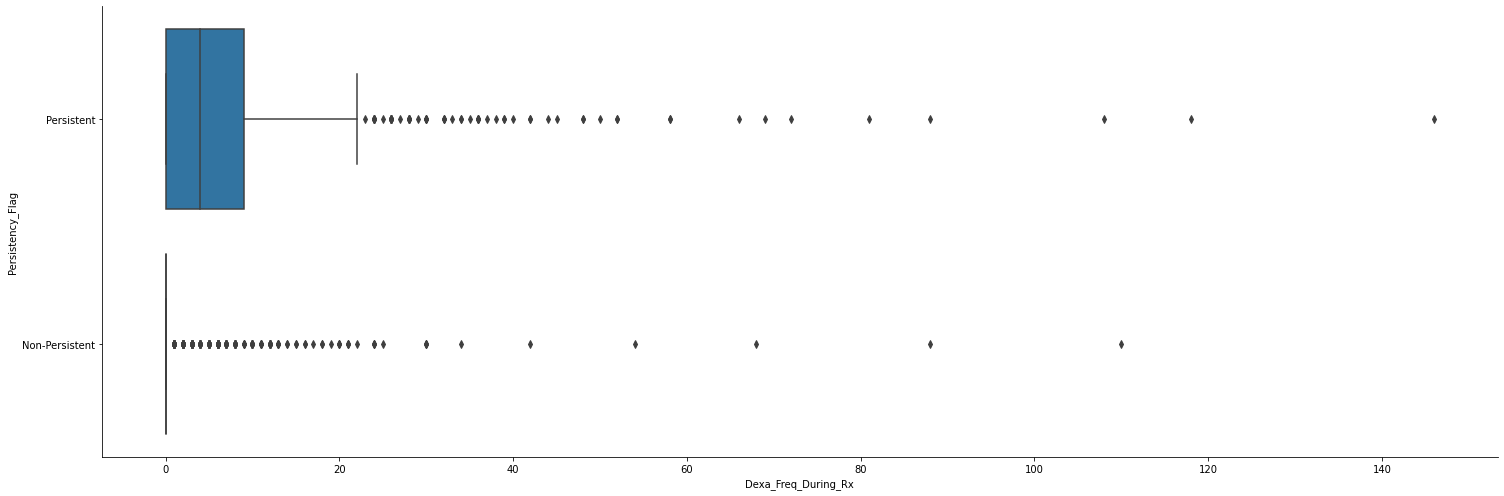

In [11]:
sns.catplot(x="Dexa_Freq_During_Rx", y="Persistency_Flag",
            kind="box", data=df_Healthcare,height=7, aspect=3);

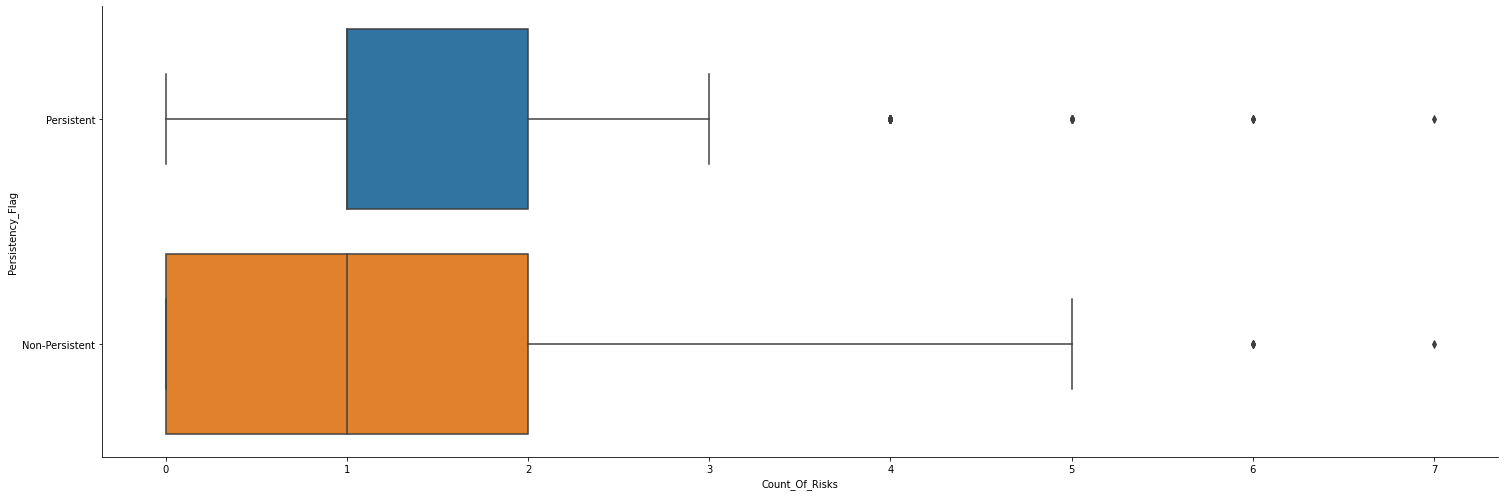

In [12]:
sns.catplot(x="Count_Of_Risks", y="Persistency_Flag",
            kind="box", data=df_Healthcare,height=7, aspect=3);

- **Z-Score**

In [13]:
outliers = []
def Dexa_Freq_During_Rx_outliers_zscore(df_Healthcare):
    threshold = 3
    mean = np.mean(df_Healthcare['Dexa_Freq_During_Rx'])
    std = np.std(df_Healthcare['Dexa_Freq_During_Rx'])
    # print(mean, std)
    for i in df_Healthcare['Dexa_Freq_During_Rx']:
        z_score = (i-mean)/std
        if (np.abs(z_score) > threshold):
            outliers.append(i)
    return outliers

In [14]:
Dexa_Freq_During_Rx_outliers = Dexa_Freq_During_Rx_outliers_zscore(df_Healthcare)
print("Dexa_Freq_During_Rx outliers from Z-scores method: ", Dexa_Freq_During_Rx_outliers)

Dexa_Freq_During_Rx outliers from Z-scores method:  [28, 37, 81, 42, 28, 30, 42, 45, 58, 33, 58, 110, 36, 34, 28, 88, 30, 66, 32, 88, 30, 118, 48, 28, 36, 69, 38, 30, 40, 32, 68, 52, 50, 146, 30, 28, 34, 52, 48, 28, 44, 32, 42, 35, 30, 39, 36, 108, 36, 54, 39, 34, 72, 30, 29, 36, 28]


In [15]:
outliers = []
def Count_Of_Risks_outliers_zscore(df_Healthcare):
    threshold = 3
    mean = np.mean(df_Healthcare['Count_Of_Risks'])
    std = np.std(df_Healthcare['Count_Of_Risks'])
    # print(mean, std)
    for i in df_Healthcare['Count_Of_Risks']:
        z_score = (i-mean)/std
        if (np.abs(z_score) > threshold):
            outliers.append(i)
    return outliers

In [16]:
Count_Of_Risks_outliers = Count_Of_Risks_outliers_zscore(df_Healthcare)
print("Count_Of_Risks outliers from Z-scores method: ", Count_Of_Risks_outliers)

Count_Of_Risks outliers from Z-scores method:  [5, 6, 5, 5, 5, 5, 5, 5, 5, 7, 7, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 5, 6]


- **IQR Range**

In [17]:
Q1 = np.percentile(df_Healthcare['Dexa_Freq_During_Rx'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df_Healthcare['Dexa_Freq_During_Rx'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df_Healthcare['Dexa_Freq_During_Rx'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
print('Interquartile range is', IQR)

Interquartile range is 3.0


In [18]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print('low_limit is', low_lim)
print('up_limit is', up_lim)

outlier =[]
for x in df_Healthcare['Dexa_Freq_During_Rx']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('Dexa_Freq_During_Rx outliers in IQR Range are', outlier)

low_limit is -4.5
up_limit is 7.5
Dexa_Freq_During_Rx outliers in IQR Range are [20, 13, 12, 20, 10, 25, 11, 18, 10, 13, 21, 15, 28, 22, 15, 37, 13, 14, 15, 14, 10, 10, 8, 14, 8, 12, 14, 12, 11, 13, 8, 9, 9, 14, 13, 14, 8, 21, 22, 14, 18, 12, 17, 14, 8, 11, 8, 81, 11, 10, 14, 12, 8, 13, 13, 8, 8, 11, 11, 9, 8, 42, 12, 13, 10, 9, 17, 17, 12, 11, 8, 16, 9, 8, 8, 8, 10, 11, 9, 8, 8, 8, 15, 11, 12, 14, 14, 10, 10, 14, 18, 8, 9, 10, 9, 11, 8, 8, 9, 13, 9, 15, 18, 8, 12, 10, 8, 12, 9, 17, 8, 10, 9, 8, 10, 12, 13, 8, 8, 9, 14, 28, 11, 16, 16, 22, 12, 10, 8, 8, 14, 15, 30, 14, 14, 42, 10, 19, 45, 12, 12, 8, 9, 11, 11, 11, 13, 27, 21, 12, 8, 24, 14, 12, 22, 12, 9, 11, 8, 14, 12, 10, 22, 13, 8, 19, 58, 16, 11, 12, 10, 10, 12, 11, 26, 11, 14, 11, 23, 16, 33, 8, 8, 58, 17, 10, 8, 110, 9, 36, 26, 10, 14, 18, 34, 16, 12, 10, 10, 28, 13, 9, 12, 10, 12, 26, 8, 12, 10, 10, 26, 10, 24, 88, 24, 21, 12, 19, 26, 30, 10, 26, 12, 66, 24, 22, 12, 32, 88, 12, 30, 10, 118, 13, 16, 12, 20, 24, 48, 8, 18, 14, 18,

In [19]:
Q1 = np.percentile(df_Healthcare['Count_Of_Risks'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df_Healthcare['Count_Of_Risks'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df_Healthcare['Count_Of_Risks'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
print('Interquartile range is', IQR)

Interquartile range is 2.0


In [20]:
low_lim = Q1 - 1.5 * IQR
up_lim = Q3 + 1.5 * IQR

print('low_limit is', low_lim)
print('up_limit is', up_lim)

outlier =[]
for x in df_Healthcare['Count_Of_Risks']:
    if ((x> up_lim) or (x<low_lim)):
         outlier.append(x)
print('Count_Of_Risks outliers in IQR Range are', outlier)

low_limit is -3.0
up_limit is 5.0
Count_Of_Risks outliers in IQR Range are [6, 7, 7, 6, 6, 6, 6, 6]


### 3. Handling Outliers

- **Capping**

Because there are many outliers in Dexa_Freq_During_Rx column, and removing a good amount of data from the dataset is not good, I used the Capping method to handle the outliers.

In [21]:
upper_limit = df_Healthcare['Dexa_Freq_During_Rx'].mean() + 3*df_Healthcare['Dexa_Freq_During_Rx'].std()
lower_limit = df_Healthcare['Dexa_Freq_During_Rx'].mean() - 3*df_Healthcare['Dexa_Freq_During_Rx'].std()

df_Healthcare['Dexa_Freq_During_Rx']=np.where(df_Healthcare['Dexa_Freq_During_Rx']>upper_limit,
                                              upper_limit, 
                                              np.where(df_Healthcare['Dexa_Freq_During_Rx']<lower_limit,
                                                     lower_limit, df_Healthcare['Dexa_Freq_During_Rx']))

In [22]:
df_Healthcare.shape

(3424, 69)

> **As I did capping, no data was lost**

df_Healthcare = pd.read_excel('Healthcare_dataset.xlsx')


- **Trimming/Removing the outliers**

In [23]:
Q1 = np.percentile(df_Healthcare['Count_Of_Risks'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df_Healthcare['Count_Of_Risks'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df_Healthcare['Count_Of_Risks'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
print('Interquartile range is', IQR)
  
upper_bound = np.where(df_Healthcare['Count_Of_Risks'] >= (Q3+1.5*IQR))
lower_bound = np.where(df_Healthcare['Count_Of_Risks'] <= (Q1-1.5*IQR))

Interquartile range is 2.0


In [24]:
#Removing the Outliers in Count_Of_Risks

df_Healthcare.drop(upper_bound[0], inplace = True)
df_Healthcare.drop(lower_bound[0], inplace = True)

#Resetting the index columns
df_Healthcare = df_Healthcare.reset_index(drop=True)

In [25]:
df_Healthcare.shape

(3401, 69)

> **After dropping the outliers in the Count_Of_Risks columns, the number of rows in the dataset was reduced from 3424 to 3401.**

In [26]:
# Dropping Ptid: Patient ID column as its not necessary for modeling

df_Healthcare = df_Healthcare.drop(['Ptid'], axis=1)
df_Healthcare.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0.0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0.0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0.0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0.0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0.0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


## EDA

In [27]:
# Replacing the unique categorical variable values with numerical values

map_1 = {'N': 0, 'Y':1}
df_Healthcare = df_Healthcare.replace(map_1)

In [28]:
# View column names 

col_names = df_Healthcare.columns
col_names

Index(['Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_Freq_During_Rx', 'Dexa_During_Rx',
       'Frag_Frac_Prior_Ntm', 'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Pers

In [29]:
# View summary of dataset 

df_Healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 68 columns):
 #   Column                                                              Non-Null Count  Dtype  
---  ------                                                              --------------  -----  
 0   Persistency_Flag                                                    3401 non-null   object 
 1   Gender                                                              3401 non-null   object 
 2   Race                                                                3401 non-null   object 
 3   Ethnicity                                                           3401 non-null   object 
 4   Region                                                              3401 non-null   object 
 5   Age_Bucket                                                          3401 non-null   object 
 6   Ntm_Speciality                                                      3401 non-null   object 
 7   Ntm_Specialist_

In [30]:
# View statistical properties of numerical variables

df_Healthcare.describe()

,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
count,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000,3401.000000
mean,0.234343,0.262864,2.679878,0.272567,0.159365,0.121435,0.745369,0.891797,0.445457,0.440165,0.393708,0.316378,0.289915,0.229932,0.236695,0.226404,0.195531,0.151426,0.514261,0.267568,0.190238,0.183475,0.344605,0.357248,0.282858,0.279036,0.184358,0.174949,0.165540,0.127021,0.143487,0.102323,0.037930,0.000882,0.036754,0.000588,0.034990,0.003528,0.071744,0.185240,0.133784,0.004704,0.101735,0.011761,0.474860,0.053220,0.018230,0.015584,0.002940,0.003822,0.018818,1.211114
std,0.423650,0.440254,5.662662,0.445345,0.366070,0.326680,0.435718,0.310683,0.497089,0.496480,0.488643,0.465131,0.453789,0.420851,0.425116,0.418565,0.396667,0.358516,0.499870,0.442756,0.392547,0.387113,0.475309,0.479259,0.450454,0.448591,0.387833,0.379979,0.371721,0.333046,0.350621,0.303117,0.191055,0.029691,0.188185,0.024246,0.183781,0.059304,0.258101,0.388549,0.340470,0.068438,0.302344,0.107825,0.499441,0.224504,0.133802,0.123876,0.054153,0.061716,0.135902,1.041269
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [31]:
# View statistical properties of character variables

df_Healthcare.describe(include='object')

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag
count,3401,3401,3401,3401,3401,3401,3401,3401,3401,3401,3401,3401,3401,3401,3401,3401
unique,2,2,4,3,5,4,36,2,3,2,2,3,3,4,4,2
top,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,VLR_LR,>-2.5,Unknown,Unknown,No change,Unknown,Adherent
freq,2125,3209,3127,3214,1379,1434,1528,2004,2095,1922,1941,1493,1493,1643,2218,3229


In [32]:
# View dimensions of dataset after cleaning 

df_Healthcare.shape

(3401, 68)

### Univariate Analysis 

#### Exploring the target variable

In [33]:
# View number of unique values

df_Healthcare['Persistency_Flag'].nunique()

2

In [34]:
# View the frequency distribution of values

Persistent = df_Healthcare[df_Healthcare['Persistency_Flag'] == "Persistent"].shape[0]
Non_Persistent = df_Healthcare[df_Healthcare['Persistency_Flag'] == "Non-Persistent"].shape[0]

print('Persistent:', Persistent)
print('Non-Persistent:', Non_Persistent)

Persistent: 1276
Non-Persistent: 2125


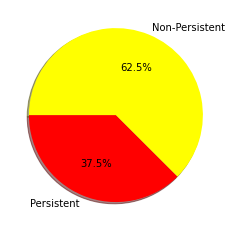

In [35]:
# Visualizing frequency distribution of the target variable

Persistency_Flag = [Persistent,Non_Persistent ]
lbl = ['Persistent','Non-Persistent']
cls = ["r", "yellow"]
plt.pie(Persistency_Flag, labels=lbl, startangle = 180, colors = cls, shadow=True, 
        autopct = '%1.1f%%')
plt.show() 


- > The number of unique values in Persistency_Flag variable is 2. The two unique values are Persistent and Non_Persistent. Out of the total number of Persistency_Flag values, Non_Persistent appears 62.5% times and Persistent appears 37.5% times.

- > The univariate plot confirms that:The Non_Persistent variable have 2125 entries, and The Persistent variable have 1276 entries.

### Bivariate Analysis 

#### Demographical Feature Analysis according to the Persistency_Flag

- **Gender**

In [36]:
gender=pd.pivot_table(df_Healthcare, columns='Persistency_Flag',
                index=['Gender'], aggfunc={'Persistency_Flag':'count'})
gender

Persistency_Flag           
Persistency_Flag   Non-Persistent Persistent
Gender                                      
Female                       2010       1199
Male                          115         77

- > Non-persistent patients are more common in both genders than persistent patients.

- **Age_Bucket**

In [37]:
age=pd.pivot_table(df_Healthcare, columns='Persistency_Flag',
                index=['Age_Bucket'], aggfunc={'Persistency_Flag':'count'})
age

Persistency_Flag           
Persistency_Flag   Non-Persistent Persistent
Age_Bucket                                  
55-65                         470        259
65-75                         647        427
<55                           101         63
>75                           907        527

- > The majority of persistent and non-persistent patients are over the age of 75

- **Ethnicity**

In [38]:
ethnicity=pd.pivot_table(df_Healthcare, columns='Persistency_Flag',
                index=['Ethnicity'], aggfunc={'Persistency_Flag':'count'})
ethnicity

Persistency_Flag           
Persistency_Flag   Non-Persistent Persistent
Ethnicity                                   
Hispanic                       65         32
Not Hispanic                 1999       1215
Unknown                        61         29

- **Race**

In [39]:
race=pd.pivot_table(df_Healthcare, columns='Persistency_Flag',
                index=['Race'], aggfunc={'Persistency_Flag':'count'})
race

Persistency_Flag           
Persistency_Flag   Non-Persistent Persistent
Race                                        
African American               65         29
Asian                          43         41
Caucasian                    1953       1174
Other/Unknown                  64         32

- **Region**

In [40]:
Region=pd.pivot_table(df_Healthcare, columns='Persistency_Flag',
                index=['Region'], aggfunc={'Persistency_Flag':'count'})
Region

Persistency_Flag           
Persistency_Flag   Non-Persistent Persistent
Region                                      
Midwest                       932        447
Northeast                     133         97
Other/Unknown                  35         25
South                         749        485
West                          276        222

### Risk, Comorbidity and Concomitant feature Analysis

In [41]:
df_Healthcare.iloc[:,24:].iloc[:,:-1].sum().sort_values(ascending=False)/df_Healthcare.iloc[:,24:].shape[0]

Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias       0.514261
Risk_Vitamin_D_Insufficiency                                          0.474860
Comorb_Encounter_For_Screening_For_Malignant_Neoplasms                0.445457
Comorb_Encounter_For_Immunization                                     0.440165
Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx       0.393708
Concom_Narcotics                                                      0.357248
Concom_Cholesterol_And_Triglyceride_Regulating_Preparations           0.344605
Comorb_Vitamin_D_Deficiency                                           0.316378
Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified                  0.289915
Concom_Systemic_Corticosteroids_Plain                                 0.282858
Concom_Anti_Depressants_And_Mood_Stabilisers                          0.279036
Comorb_Osteoporosis_without_current_pathological_fracture             0.267568
Comorb_Long_Term_Current_Drug_Therapy               

- > We can observe that the majority of patients already have Comorbidity factors, whereas risk factors are less common.

### Analysis of average Count_Of_Risks, Dexa_Freq_During_Rx according to the Gender, Age_Bucket and Persistency_Flag

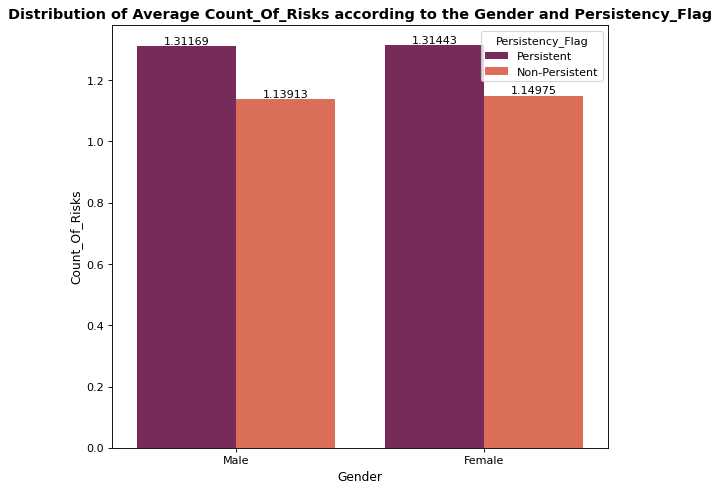

In [46]:
plt.figure(figsize=(8, 7), dpi=80)
a=sns.barplot(x='Gender', y="Count_Of_Risks", hue="Persistency_Flag", data=df_Healthcare,  estimator=get_mean, palette="rocket", ci=None)

for i in a.containers:
    a.bar_label(i,)

    plt.title('Distribution of Average Count_Of_Risks according to the Gender and Persistency_Flag', fontweight="bold", fontsize= 13)
plt.xlabel('Gender', fontsize= 11)
plt.ylabel('Count_Of_Risks', fontsize= 11);

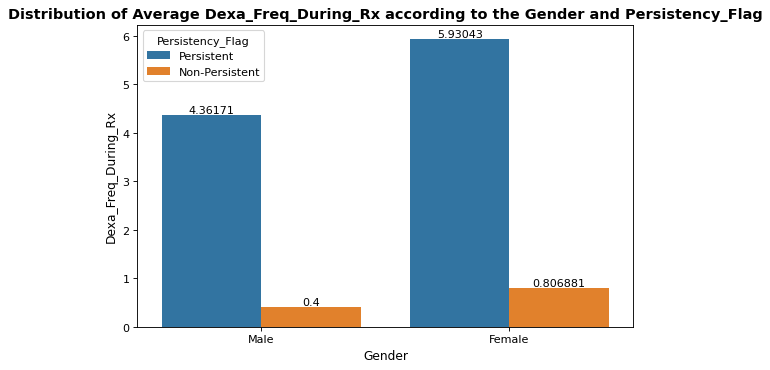

In [47]:
plt.figure(figsize=(8, 5), dpi=80)
b=sns.barplot(x='Gender', y="Dexa_Freq_During_Rx", hue="Persistency_Flag", data=df_Healthcare,  estimator=get_mean, palette="tab10", ci=None)

for i in b.containers:
    b.bar_label(i,)

plt.title('Distribution of Average Dexa_Freq_During_Rx according to the Gender and Persistency_Flag', fontweight="bold", fontsize= 13)
plt.xlabel('Gender', fontsize= 11)
plt.ylabel('Dexa_Freq_During_Rx', fontsize= 11);

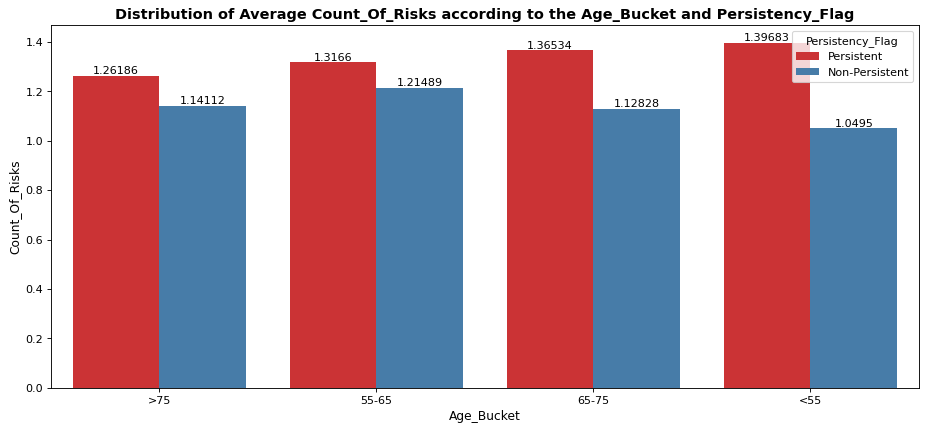

In [49]:
plt.figure(figsize=(14,6), dpi=80)
c=sns.barplot(x='Age_Bucket', y="Count_Of_Risks", hue="Persistency_Flag", data=df_Healthcare,  estimator=get_mean, palette="Set1", ci=None)

for i in c.containers:
    c.bar_label(i,)

plt.title('Distribution of Average Count_Of_Risks according to the Age_Bucket and Persistency_Flag', fontweight="bold", fontsize= 13)
plt.xlabel('Age_Bucket', fontsize= 11)
plt.ylabel('Count_Of_Risks', fontsize= 11);

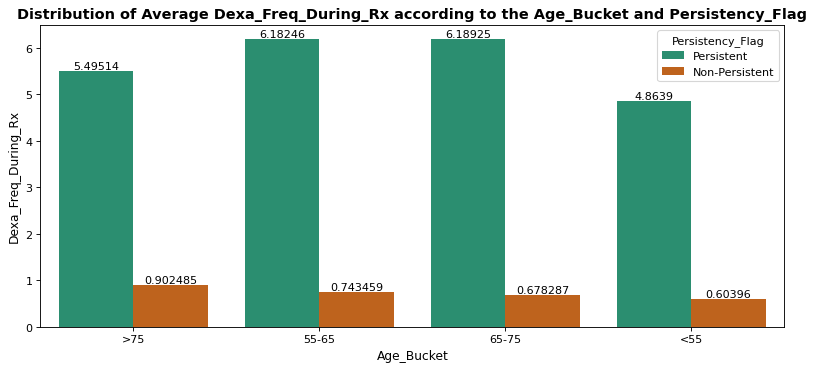

In [48]:
plt.figure(figsize=(12, 5), dpi=80)
d=sns.barplot(x='Age_Bucket', y="Dexa_Freq_During_Rx", hue="Persistency_Flag", data=df_Healthcare,  estimator=get_mean, palette="Dark2", ci=None)

for i in d.containers:
    d.bar_label(i,)
    
plt.title('Distribution of Average Dexa_Freq_During_Rx according to the Age_Bucket and Persistency_Flag', fontweight="bold", fontsize= 13)
plt.xlabel('Age_Bucket', fontsize= 11)
plt.ylabel('Dexa_Freq_During_Rx', fontsize= 11);

### Some other Clinical and Provider Attributes Features Analysis according to the Persistency_Flag

In [57]:
pd.crosstab(df_Healthcare.Ntm_Specialist_Flag, df_Healthcare.Persistency_Flag, normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Ntm_Specialist_Flag,,
Others,0.681138,0.318862
Specialist,0.544023,0.455977


In [59]:
pd.crosstab(df_Healthcare.Ntm_Speciality_Bucket, df_Healthcare.Persistency_Flag, normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Ntm_Speciality_Bucket,,
Endo/Onc/Uro,0.463932,0.536068
OB/GYN/Others/PCP/Unknown,0.680191,0.319809
Rheum,0.621035,0.378965


In [60]:
pd.crosstab(df_Healthcare.Risk_Chronic_Liver_Disease, df_Healthcare.Persistency_Flag, normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Risk_Chronic_Liver_Disease,,
0,0.625702,0.374298
1,0.437500,0.562500


In [61]:
pd.crosstab(df_Healthcare.Risk_Excessive_Thinness, df_Healthcare.Persistency_Flag, normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Risk_Excessive_Thinness,,
0,0.622342,0.377658
1,0.758065,0.241935


In [62]:
pd.crosstab(df_Healthcare.Risk_Low_Calcium_Intake, df_Healthcare.Persistency_Flag, normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Risk_Low_Calcium_Intake,,
0,0.624219,0.375781
1,0.675000,0.325000


In [64]:
pd.crosstab(df_Healthcare.Risk_Estrogen_Deficiency, df_Healthcare.Persistency_Flag, normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Risk_Estrogen_Deficiency,,
0,0.6243,0.3757
1,0.8000,0.2000


In [65]:
pd.crosstab(df_Healthcare.Risk_Smoking_Tobacco, df_Healthcare.Persistency_Flag, normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Risk_Smoking_Tobacco,,
0,0.646698,0.353302
1,0.528571,0.471429


In [66]:
pd.crosstab(df_Healthcare.Risk_Type_1_Insulin_Dependent_Diabetes, df_Healthcare.Persistency_Flag, normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Risk_Type_1_Insulin_Dependent_Diabetes,,
0,0.622861,0.377139
1,0.674419,0.325581


In [67]:
pd.crosstab(df_Healthcare.Adherent_Flag, df_Healthcare.Persistency_Flag, normalize='index')

Persistency_Flag,Non-Persistent,Persistent
Adherent_Flag,,
Adherent,0.637349,0.362651
Non-Adherent,0.389535,0.610465


### Patients' Health improvemet Analysis according to Persistency_Flag

In [69]:
pd.crosstab(df_Healthcare.Change_T_Score, df_Healthcare.Persistency_Flag)

Persistency_Flag,Non-Persistent,Persistent
Change_T_Score,,
Improved,28,66
No change,951,692
Unknown,1080,413
Worsened,66,105


In [70]:
pd.crosstab(df_Healthcare.Change_Risk_Segment, df_Healthcare.Persistency_Flag)

Persistency_Flag,Non-Persistent,Persistent
Change_Risk_Segment,,
Improved,9,13
No change,615,425
Unknown,1453,765
Worsened,48,73
